# Maximális folyam

1. feladat: Legyen adott az alábbi, 7 csúcsból és 12 élből álló irányított hálózat, melyben az élsúlyok az egyes élek kapacitását jelölik.

{(1, 2): Text(0.5, -0.5, '5'),
 (1, 3): Text(1.0, 0.0, '7'),
 (1, 4): Text(1.0, 0.5, '4'),
 (2, 3): Text(1.5, -0.5, '1'),
 (2, 5): Text(2.0, -1.0, '3'),
 (3, 4): Text(2.0, 0.5, '4'),
 (3, 5): Text(2.5, -0.5, '4'),
 (3, 6): Text(2.5, 0.5, '5'),
 (4, 6): Text(2.5, 1.0, '4'),
 (5, 7): Text(3.5, -0.5, '9'),
 (6, 5): Text(3.0, 0.0, '1'),
 (6, 7): Text(3.5, 0.5, '6')}

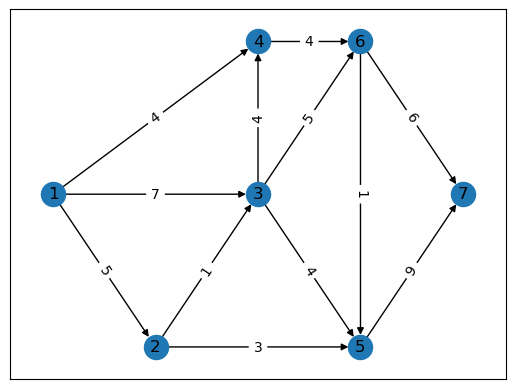

In [3]:
import networkx as nx

G = nx.DiGraph()
G.add_nodes_from(range(1,7))
G.add_edge(1, 2, weight = 5)
G.add_edge(1, 3, weight = 7)
G.add_edge(1, 4, weight = 4)
G.add_edge(2, 3, weight = 1)
G.add_edge(2, 5, weight = 3)
G.add_edge(3, 4, weight = 4)
G.add_edge(3, 5, weight = 4)
G.add_edge(3, 6, weight = 5)
G.add_edge(4, 6, weight = 4)
G.add_edge(5, 7, weight = 9)
G.add_edge(6, 5, weight = 1)
G.add_edge(6, 7, weight = 6)

pos={1:(0,0), 2:(1,-1), 3:(2,0), 4:(2,1), 5:(3,-1), 6:(3,1), 7:(4,0)}
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx(G, pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels)

a) Legyenek az aktuális folyam értékek az alábbiak:
$$
\begin{array}{l|c|c}
\text{Él} & \text{Folyam} & \text{Kapacitás} \\ \hline
\text{(1,2)} & 4 & 5 \\
\text{(1,3)} & 7 & 7 \\
\text{(1,4)} &  & 4 \\
\text{(2,3)} & 1 & 1 \\
\text{(2,5)} & 3 & 3 \\
\text{(3,4)} &  & 4 \\
\text{(3,5)} & 4 & 4 \\
\text{(3,6)} & 4 & 5 \\
\text{(4,6)} &  & 4 \\
\text{(5,7)} & 7 & 9 \\
\text{(6,5)} &  & 1 \\
\text{(6,7)} & 4 & 6
\end{array}
$$

Házi feladat: **Emlékeztető/ismétlés az előadásról (és Számítástudomány óráról)**
<br>Mennyi az 1-ből 7-be menő össz. folyam értéke? Maximális ez a folyam? Lássuk be növelő láncok keresésével (Ford-Fulkerson algoritmus), hogy maximális, vagy keressük meg a maximális folyamot!

1-ből telítetlen előre mutató élen elérhető 2 és 4 (őket megcímkézzük).
<br>2-ből minden kimenő él telített, beérkező csak 1-ből jön, nincs új címke.
<br>4-ből elérhető 6 telítetlen előre mutató élen (6-ot címkézzük).

6-ból elérhető 5 telítetlen **előre mutató** élen (5-öt címkézzük).
<br>*Megjegyzés: címkézhetnénk 3-at is **hátra mutató** élen a beérkező pozitív folyam érték miatt.*

5-ből telítetlen előre mutató élen elérhető 7, találtunk javító láncot (ezúttal is utat): 1-4-6-5-7.
<br>A javítás mértéke: $\min \{4-2, 4-2, 0-1, 9-7\} = 1$

A javítás után a folyam értékek:

$$
\begin{array}{l|c|c}
\text{Él} & \text{Folyam} & \text{Kapacitás} \\ \hline
\text{(1,2)} & 4 & 5 \\
\text{(1,3)} & 7 & 7 \\
\text{(1,4)} & 3 & 4 \\
\text{(2,3)} & 1 & 1 \\
\text{(2,5)} & 3 & 3 \\
\text{(3,4)} &  & 4 \\
\text{(3,5)} & 4 & 4 \\
\text{(3,6)} & 4 & 5 \\
\text{(4,6)} & 3 & 4 \\
\text{(5,7)} & 8 & 9 \\
\text{(6,5)} & 1 & 1 \\
\text{(6,7)} & 6 & 6
\end{array}
$$

Az össz. folyam érték már 14.

Címkézéssel 1-ből elérhető 2 és 4. 2-ből továbbra sincs új címke, 4-ből továbbra is elérhető 6.
<br>6-ból minden kimenő él telített, de 3 láncon keresztül elérhető a beérkező pozitív folyam érték miatt (3-at megcímkézzük).
<br>3-ból az 5-be vezető él már telített, a 4 és 6 nem, de ezeket már vizsgáltuk: nincs új címke, 7 nem érhető el növelő láncon.

*Minimális vágás:* legyen $V=\{1,2,3,4,6\}$ a címkézett csúcsok (javító lánc mentén elérhetőek), $V'=\{5,7\}$ a többi. A $V$-beli csúcsokból a $V'$-beli csúcsokba vezető élek össz. kapacitása:
<br>$3+4+1+6=14$ a $(2,5), (3,5), (6,5)$ és $(6,7)$ élek mentén

Tehát az aktuális 14 értékű folyam maximális.

**Maximális folyam és minimális vágás a networkx csomag használatával:**

In [4]:
flow_value, flow_dict = nx.maximum_flow(G, 1, 7, capacity="weight")

In [6]:
elek = list(G.edges())
for i in range(len(elek)):
    print("x"+str(elek[i])+" =", flow_dict[elek[i][0]][elek[i][1]])
print("Maximális folyam össz. értéke:", flow_value)

x(1, 2) = 4
x(1, 3) = 6
x(1, 4) = 4
x(2, 3) = 1
x(2, 5) = 3
x(3, 4) = 0
x(3, 5) = 4
x(3, 6) = 3
x(4, 6) = 4
x(5, 7) = 8
x(6, 5) = 1
x(6, 7) = 6
Maximális folyam össz. értéke: 14


In [8]:
cut_value, partition = nx.minimum_cut(G, 1, 7, capacity="weight")
reachable, non_reachable = partition

In [9]:
print("W =", reachable)
print("W'=", non_reachable)
print("Minimális vágás értéke:", cut_value)

W = {1, 2, 3, 4, 6}
W'= {5, 7}
Minimális vágás értéke: 14


b) Adjuk meg a maximális folyamot meghatározó LP modelljét!

*Megoldás:* $x_{ij}$ az $(i,j)$ élen áramló folyam. A folyam modell:
$$
\begin{array}{rccc}
\max & x_{12} + x_{13} + x_{14} & & \\
\text{f.h.} & x_{12}  & \leq & 5 \\
& x_{13}  & \leq & 7 \\
& x_{14}  & \leq & 4 \\
& x_{23}  & \leq & 1 \\
& x_{25}  & \leq & 3 \\
& x_{34}  & \leq & 4 \\
& x_{35}  & \leq & 4 \\
& x_{36}  & \leq & 5 \\
& x_{46}  & \leq & 4 \\
& x_{57}  & \leq & 9 \\
& x_{65}  & \leq & 1 \\
& x_{67}  & \leq & 6 \\
& x_{12} - x_{23} - x_{25} & = & 0 \\
& x_{13} + x_{23} - x_{34} - x_{35} - x_{36} & = & 0 \\
& x_{14} + x_{34} - x_{46} & = & 0 \\
& x_{25} + x_{35} + x_{65} - x_{57} & = & 0 \\
& x_{36} + x_{46} - x_{65} - x_{67} & = & 0 \\
& x_{12}, x_{13}, x_{14}, x_{23}, x_{25}, x_{34}, x_{35}, x_{36}, x_{46}, x_{57}, x_{65}, x_{67} & \geq & 0
\end{array}
$$

c) Formalizáljuk az LP modellt pulpban, oldjuk meg és adjuk meg a maximális folyam megoldást, illetve annak össz. értékét!

In [4]:
# Megoldás: folyam modellel (áram modellt ld. alább a 2. feladat megoldásában)

from pulp import *

max_folyam = pulp.LpProblem('max_folyam', LpMaximize)

#Definiálunk egy változót minden élhez
x = LpVariable.dicts('x',[(i,j) for i,j in G.edges()], lowBound = 0, cat="Continuous")

#A nyelőbe mutató éleken áthaladó folyam mennyiségét maximalizáljuk (lehetne a forrásból kilépő élekre is)
max_folyam += lpSum(x[i,j] for i,j in G.out_edges(1))

#Kapacitáskorlátok
for i,j in G.edges():
    max_folyam += x[i,j] <= G[i][j]['weight']

#Folyammegmaradási feltételek (a forrásra és a nyelőre nem kell felírni)
for v in G.nodes():
    if v == 1 or v == 7:  
        continue
    else:
        max_folyam += lpSum(x[i,j] for i,j in G.in_edges(v))-lpSum(+x[i,j] for i,j in G.out_edges(v)) == 0
    
megoldas = max_folyam.solve()

print(LpStatus[megoldas])
if LpStatus[megoldas] == 'Optimal':
    print('Maximális folyam össz. értéke: z* = ', value(max_folyam.objective))
    for i,j in G.edges():
        print ("x"+str((i,j))+" =", x[i,j].varValue)

Optimal
Maximális folyam össz. értéke: z* =  14.0
x(1, 2) = 4.0
x(1, 3) = 7.0
x(1, 4) = 3.0
x(2, 3) = 1.0
x(2, 5) = 3.0
x(3, 4) = 1.0
x(3, 5) = 4.0
x(3, 6) = 3.0
x(4, 6) = 4.0
x(5, 7) = 8.0
x(6, 5) = 1.0
x(6, 7) = 6.0


d) Mely élek kapacitását lenne érdemes bővíteni, és honnan tudjuk ezt megállapítani?

*Megoldás:* pontosan azon élekét, amelyekre vonatkozó kapacitáskorlát árnyékára 1

In [13]:
i=0
for name, p in max_folyam.constraints.items():
    print('y'+str(elek[i])+' =', p.pi)
    i += 1
    if (i == len(elek)):
        break

y(1, 2) = -0.0
y(1, 3) = -0.0
y(1, 4) = -0.0
y(2, 3) = -0.0
y(2, 5) = 1.0
y(3, 4) = -0.0
y(3, 5) = 1.0
y(3, 6) = -0.0
y(4, 6) = -0.0
y(5, 7) = -0.0
y(6, 5) = 1.0
y(6, 7) = 1.0


e) Mi lesz az optimális megoldás, ha az összes d) válaszban szereplő él kapacitását egyszerre tudnánk bővíteni?

In [16]:
# Megoldás:

# kiválasztjuk mely kapacitáskorlátok esetén 1 az árnyékár
d={}
i=0
for name, p in max_folyam.constraints.items():
    d[elek[i]]=p.pi
    i += 1
    if (i == len(elek)):
        break

# új modell az új kapacitáskorlátok miatt
max_folyam2 = pulp.LpProblem('max_folyam', LpMaximize)

#Definiálunk egy változót minden élhez
x = LpVariable.dicts('x',[(i,j) for i,j in G.edges()], lowBound = 0, cat="Continuous")
bov = LpVariable.dicts('bővítés',[(i,j) for i,j in G.edges()], lowBound = 0, cat="Continuous")

#A nyelőbe mutató éleken áthaladó folyam mennyiségét maximalizáljuk (lehetne a forrásból kilépő élekre is)
max_folyam2 += lpSum(x[i,j] for i,j in G.out_edges(1))

#Kapacitáskorlátok
for i,j in G.edges():
    if (d[i,j] == 1):
        max_folyam2 += x[i,j] - bov[i,j] <= G[i][j]['weight']
    else:
        max_folyam2 += x[i,j] <= G[i][j]['weight']

#A folyammegmaradási feltételek (a forrásra és a nyelőre nem kell felírni)
for v in G.nodes():
    if v == 1 or v == 7:  
        continue
    else:
        max_folyam2 += lpSum(x[i,j] for i,j in G.in_edges(v))-lpSum(x[i,j] for i,j in G.out_edges(v)) == 0
    
megoldas = max_folyam2.solve()

print(LpStatus[megoldas])
if LpStatus[megoldas] == 'Optimal':
    print('Maximális folyam össz. értéke: z* = ', value(max_folyam2.objective))
    for i,j in G.edges():
        print ("x"+str((i,j))+" =", x[i,j].varValue)
        if (d[i,j] == 1) and (bov[i,j].varValue > 0):
            print ("bővítés"+str((i,j))+" =", bov[i,j].varValue)

Optimal
Maximális folyam össz. értéke: z* =  16.0
x(1, 2) = 5.0
x(1, 3) = 7.0
x(1, 4) = 4.0
x(2, 3) = 0.0
x(2, 5) = 5.0
bővítés(2, 5) = 2.0
x(3, 4) = 0.0
x(3, 5) = 4.0
x(3, 6) = 3.0
x(4, 6) = 4.0
x(5, 7) = 9.0
x(6, 5) = 0.0
x(6, 7) = 7.0
bővítés(6, 7) = 1.0


f) Tegyük fel, hogy az alapesethez képest minden él kapacitása bővíthető tetszőleges mértékben, az alábbi egységköltségeken:
$$
\begin{array}{l|c|c}
\text{Él} & \text{Költség} \\ \hline
\text{(1,2)} & 11 \\
\text{(1,3)} & 7 \\
\text{(1,4)} & 9 \\
\text{(2,3)} & 4 \\
\text{(2,5)} & 15 \\
\text{(3,4)} & 13 \\
\text{(3,5)} & 5 \\
\text{(3,6)} & 7 \\
\text{(4,6)} & 6 \\
\text{(5,7)} & 11 \\
\text{(6,5)} & 8 \\
\text{(6,7)} & 14 
\end{array}
$$

Az LP modell módosításával határozzuk meg egy minimális költségű, legalább 20 össz. értékű folyamot!

In [38]:
# Megoldás:

max_folyam3 = pulp.LpProblem('min_költségű_fix_folyam', LpMinimize)

x = LpVariable.dicts('x',[(i,j) for i,j in G.edges()], lowBound = 0, cat="Continuous")
bov = LpVariable.dicts('bővítés',[(i,j) for i,j in G.edges()], lowBound = 0, cat="Continuous")

# költségek:
C={}
C[1,2]=11
C[1,3]=7
C[1,4]=9
C[2,3]=4
C[2,5]=15
C[3,4]=13
C[3,5]=5
C[3,6]=7
C[4,6]=6
C[5,7]=11
C[6,5]=8
C[6,7]=14

# célfüggvény:
max_folyam3 += pulp.lpSum([C[i,j]*bov[i,j] for i,j in G.edges()])

#Kapacitáskorlátok
for i,j in G.edges():
    max_folyam3 += x[i,j] - bov[i,j] <= G[i][j]['weight']

#A folyammegmaradási feltételek (a forrásra és a nyelőre nem kell felírni)
for v in G.nodes():
    if v == 1 or v == 7:  
        continue
    else:
        max_folyam3 += lpSum(x[i,j] for i,j in G.in_edges(v))-lpSum(x[i,j] for i,j in G.out_edges(v)) == 0

max_folyam3 += lpSum(x[i,j] for i,j in G.out_edges(1)) >= 20
    
megoldas = max_folyam3.solve()

print(LpStatus[megoldas])
if LpStatus[megoldas] == 'Optimal':
    print('Minimális költség: z* = ', value(max_folyam3.objective))
    for i,j in G.edges():
        print ("x"+str((i,j))+" =", x[i,j].varValue)
        if bov[i,j].varValue > 0:
            print ("bővítés"+str((i,j))+" =", bov[i,j].varValue)

Optimal
Minimális költség: z* =  113.0
x(1, 2) = 5.0
x(1, 3) = 11.0
bővítés(1, 3) = 4.0
x(1, 4) = 4.0
x(2, 3) = 2.0
bővítés(2, 3) = 1.0
x(2, 5) = 3.0
x(3, 4) = 0.0
x(3, 5) = 8.0
bővítés(3, 5) = 4.0
x(3, 6) = 5.0
x(4, 6) = 4.0
x(5, 7) = 12.0
bővítés(5, 7) = 3.0
x(6, 5) = 1.0
x(6, 7) = 8.0
bővítés(6, 7) = 2.0


## Gyakorló feladat

2. feladat: Legyen adott az alábbi, 10 csúcsból és 17 élből álló irányított hálózat, melyben az élsúlyok az egyes élek kapacitását jelölik.

{(1, 2): Text(0.499996255151927, 0.0, '9'),
 (1, 5): Text(-0.5000029192306101, -0.5000029192306106, '9'),
 (1, 6): Text(-0.5000029192306101, 0.5000029192306101, '11'),
 (2, 3): Text(1.5000029192306106, 0.5000029192306101, '9'),
 (2, 4): Text(1.5000029192306106, -0.5000029192306106, '8'),
 (3, 4): Text(2.0000000000000004, -5.20525500182778e-05, '14'),
 (3, 6): Text(0.4999961537541817, 0.9999999999999991, '13'),
 (3, 7): Text(2.5000029192306097, 1.5000029192306101, '5'),
 (4, 5): Text(0.4999961537541817, -1.0000000000000004, '15'),
 (4, 8): Text(2.5000029192306097, -1.5000029192306106, '7'),
 (5, 6): Text(-1.0, 5.205255001783371e-05, '12'),
 (5, 9): Text(-1.5000029192306097, -1.5000029192306106, '16'),
 (6, 10): Text(-1.5000029192306097, 1.5000029192306101, '10'),
 (7, 8): Text(3.0000000000000004, -8.066650480476056e-06, '18'),
 (7, 10): Text(0.5000044847547547, 2.0, '6'),
 (8, 9): Text(0.5000044847547547, -2.0, '4'),
 (9, 10): Text(-1.9999999999999998, 8.066650479587878e-06, '17')}

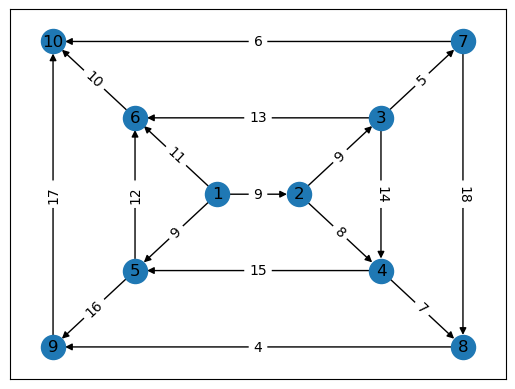

In [54]:
G = nx.DiGraph()
G.add_nodes_from(range(1,11))
G.add_edge(1, 2, weight = 9)
G.add_edge(1, 5, weight = 9)
G.add_edge(1, 6, weight = 11)
G.add_edge(2, 3, weight = 9)
G.add_edge(2, 4, weight = 8)
G.add_edge(3, 4, weight = 14)
G.add_edge(3, 6, weight = 13)
G.add_edge(3, 7, weight = 5)
G.add_edge(4, 5, weight = 15)
G.add_edge(4, 8, weight = 7)
G.add_edge(5, 6, weight = 12)
G.add_edge(5, 9, weight = 16)
G.add_edge(6, 10, weight = 10)
G.add_edge(7, 8, weight = 18)
G.add_edge(7, 10, weight = 6)
G.add_edge(8, 9, weight = 4)
G.add_edge(9, 10, weight = 17)

pos={1:(0,0), 2:(1,0), 3:(2,1), 4:(2,-1), 5:(-1,-1), 6:(-1,1), 7:(3,2), 8:(3,-2), 9:(-2,-2), 10:(-2,2)}
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx(G, pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels)

a) Mennyi az 1-ből 10-be menő maximális össz. folyam értéke? Keressünk növelő láncokat a maximális folyam megtalálásáig, majd egy minimális vágás meghatározásával lássuk be, hogy az maximális!

*Megoldás:* a javító láncok (ezúttal mind utak) és az azokon elérhető javítások az alábbiak
<br>1-6-10: 10
<br>1-5-9-10: 9
<br>1-2-4-5-9-10: 7
<br>1-2-3-7-10: 2

Az így kapott 28 össz. értékű folyam maximális, amelyet a $W=\{1, 6\}$, $W'=\{2, 3, 4, 5, 7, 8, 9, 10\}$ minimális össz. kapacitású vágás tanusít.

b) Formalizáljuk a max folyam LP modellt pulpban, oldjuk meg és adjuk meg a maximális folyam megoldást, illetve annak össz. értékét!

In [56]:
# Megoldás:

max_folyam = pulp.LpProblem('max_folyam', LpMaximize)

#Definiálunk egy változót minden élhez
x = LpVariable.dicts('x',[(i,j) for i,j in G.edges()], lowBound = 0, cat="Continuous")

max_folyam += lpSum(x[i,j] for i,j in G.out_edges(1))

#Kapacitáskorlátok
for i,j in G.edges():
    max_folyam += x[i,j] <= G[i][j]['weight']

for v in G.nodes():
    if v == 1 or v == 10:  
        continue
    else:
        max_folyam += lpSum(x[i,j] for i,j in G.in_edges(v))-lpSum(x[i,j] for i,j in G.out_edges(v)) == 0
    
megoldas = max_folyam.solve()

print(LpStatus[megoldas])
if LpStatus[megoldas] == 'Optimal':
    print('Maximális folyam össz. értéke: z* = ', value(max_folyam.objective))
    for i,j in G.edges():
        print ("x"+str((i,j))+" =", x[i,j].varValue)

Optimal
Maximális folyam össz. értéke: z* =  28.0
x(1, 2) = 9.0
x(1, 5) = 9.0
x(1, 6) = 10.0
x(2, 3) = 5.0
x(2, 4) = 4.0
x(3, 4) = 0.0
x(3, 6) = 0.0
x(3, 7) = 5.0
x(4, 5) = 4.0
x(4, 8) = 0.0
x(5, 6) = 0.0
x(5, 9) = 13.0
x(6, 10) = 10.0
x(7, 8) = 0.0
x(7, 10) = 5.0
x(8, 9) = 0.0
x(9, 10) = 13.0


c) Mely élek kapacitását lenne érdemes bővíteni, és honnan tudjuk ezt megállapítani?

*Megoldás:* pontosan azon élekét, amelyekre vonatkozó kapacitáskorlát árnyékára 1

In [58]:
elek = list(G.edges())
i=0
for name, p in max_folyam.constraints.items():
    print('y'+str(elek[i])+' =', p.pi)
    i += 1
    if (i == len(elek)):
        break

y(1, 2) = 1.0
y(1, 5) = 1.0
y(1, 6) = -0.0
y(2, 3) = -0.0
y(2, 4) = -0.0
y(3, 4) = -0.0
y(3, 6) = -0.0
y(3, 7) = -0.0
y(4, 5) = -0.0
y(4, 8) = -0.0
y(5, 6) = -0.0
y(5, 9) = -0.0
y(6, 10) = 1.0
y(7, 8) = -0.0
y(7, 10) = -0.0
y(8, 9) = -0.0
y(9, 10) = -0.0


d) Mi lesz az optimális megoldás, ha az összes c) válaszban szereplő él kapacitását egyszerre tudnánk bővíteni?

In [60]:
# Megoldás:

# kiválasztjuk mely kapacitáskorlátok esetén 1 az árnyékár
d=[0]*len(elek)
i=0
count=0
for name, p in max_folyam.constraints.items():
    d[i]=p.pi
    if (d[i] == 1):
        count += 1
    i += 1
    if (i == len(elek)):
        break

# új modell az új kapacitáskorlátok miatt
max_folyam2 = pulp.LpProblem('max_folyam', LpMaximize)

#Definiálunk egy változót minden élhez
x = LpVariable.dicts('x',[(i,j) for i,j in G.edges()], lowBound = 0, cat="Continuous")
bov = LpVariable.dicts('bővítés',range(count), lowBound = 0, cat="Continuous")

max_folyam2 += lpSum(x[i,j] for i,j in G.out_edges(1))

#Kapacitáskorlátok
k = 0 # k-dik él a gráfban
l = 0 # l-dik bővítés változó
for i,j in G.edges():
    if (k < len(elek) - 1):
        if (d[k] == 1):
            max_folyam2 += x[i,j] - bov[l] <= G[i][j]['weight']
            l += 1
        else:
            max_folyam2 += x[i,j] <= G[i][j]['weight']
        k += 1

for v in G.nodes():
    if v == 1 or v == 10:
        continue
    else:
        max_folyam2 += lpSum(x[i,j] for i,j in G.in_edges(v))-lpSum(x[i,j] for i,j in G.out_edges(v)) == 0
    
megoldas = max_folyam2.solve()

print(LpStatus[megoldas])
if LpStatus[megoldas] == 'Optimal':
    print('Maximális folyam össz. értéke: z* = ', value(max_folyam2.objective))
    for i,j in G.edges():
        print ("x"+str((i,j))+" =", x[i,j].varValue)
    for i in range(count):
        print ("bővítés_"+str(i)+" =", bov[i].varValue)

Optimal
Maximális folyam össz. értéke: z* =  52.0
x(1, 2) = 17.0
x(1, 5) = 24.0
x(1, 6) = 11.0
x(2, 3) = 9.0
x(2, 4) = 8.0
x(3, 4) = 0.0
x(3, 6) = 9.0
x(3, 7) = 0.0
x(4, 5) = 4.0
x(4, 8) = 4.0
x(5, 6) = 12.0
x(5, 9) = 16.0
x(6, 10) = 32.0
x(7, 8) = 0.0
x(7, 10) = 0.0
x(8, 9) = 4.0
x(9, 10) = 20.0
bővítés_0 = 8.0
bővítés_1 = 15.0
bővítés_2 = 22.0


e) Tegyük fel, hogy az alapesethez képest minden él kapacitása bővíthető tetszőleges mértékben, az alábbi egységköltségeken:
$$
\begin{array}{l|c|c}
\text{Él} & \text{Költség} \\ \hline
\text{(1,2)} & 11 \\
\text{(1,5)} & 4 \\
\text{(2,3)} & 7 \\
\text{(2,4)} & 2 \\
\text{(3,7)} & 9 \\
\text{(4,8)} & 3 \\
\text{(5,6)} & 6 \\
\text{(7,10)} & 13
\end{array}
$$

Az LP modell módosításával határozzuk meg egy minimális költségű, legalább 29 össz. értékű folyamot!

In [16]:
# Megoldás:

max_folyam3 = pulp.LpProblem('min_költségű_fix_folyam', LpMinimize)

x = LpVariable.dicts('x',[(i,j) for i,j in G.edges()], lowBound = 0, cat="Continuous")
bov = LpVariable.dicts('bővítés',range(len(elek)), lowBound = 0, cat="Continuous")

# költségek:
C = [11, 4, 0, 7, 2, 0, 0, 9, 0, 3, 6, 0, 0, 0, 13, 0, 0, 0]

# célfüggvény:
max_folyam3 += pulp.lpSum([C[i]*bov[i] for i in range(len(elek))])

#Kapacitáskorlátok
k = 0 # k-dik él a gráfban
for i,j in G.edges():
    max_folyam3 += x[i,j] - bov[k] <= G[i][j]['weight']
    k += 1

for v in G.nodes():
    if v == 1 or v == 10:
        continue
    else:
        max_folyam3 += lpSum(x[i,j] for i,j in G.in_edges(v))-lpSum(x[i,j] for i,j in G.out_edges(v)) == 0
    
max_folyam3 += lpSum(x[i,j] for i,j in G.out_edges(1)) >= 29

for k in range(len(elek)):
    if (C[k] == 0):
        max_folyam3 += bov[k] == 0
    
megoldas = max_folyam3.solve()

print(LpStatus[megoldas])
if LpStatus[megoldas] == 'Optimal':
    print('Minimális költség: z* = ', value(max_folyam3.objective))
    for i,j in G.edges():
        print ("x"+str((i,j))+" =", x[i,j].varValue)
    for i in range(len(elek)):
        print ("bővítés"+str(elek[i])+" =", bov[i].varValue)

Optimal
Minimális költség: z* =  4.0
x(1, 2) = 9.0
x(1, 5) = 10.0
x(1, 6) = 10.0
x(2, 3) = 2.0
x(2, 4) = 7.0
x(3, 4) = 0.0
x(3, 6) = 0.0
x(3, 7) = 2.0
x(4, 5) = 3.0
x(4, 8) = 4.0
x(5, 6) = 0.0
x(5, 9) = 13.0
x(6, 10) = 10.0
x(7, 8) = 0.0
x(7, 10) = 2.0
x(8, 9) = 4.0
x(9, 10) = 17.0
bővítés(1, 2) = 0.0
bővítés(1, 5) = 1.0
bővítés(1, 6) = 0.0
bővítés(2, 3) = 0.0
bővítés(2, 4) = 0.0
bővítés(3, 4) = 0.0
bővítés(3, 6) = 0.0
bővítés(3, 7) = 0.0
bővítés(4, 5) = 0.0
bővítés(4, 8) = 0.0
bővítés(5, 6) = 0.0
bővítés(5, 9) = 0.0
bővítés(6, 10) = 0.0
bővítés(7, 8) = 0.0
bővítés(7, 10) = 0.0
bővítés(8, 9) = 0.0
bővítés(9, 10) = 0.0


# Maximális folyam variánsok

## Irányítatlan gráf

Visszavezetjük az irányított esetre:
* minden $ij \in V$ irányítatlan él helyére vezessünk be 2 $(i,j), (j,i)$ irányított élt

Példa: az 1. feladatban megadott gráf

{(1, 2): Text(0.4999883318087086, -0.49998833180870883, '5'),
 (1, 3): Text(1.000002278713509, 0.0, '7'),
 (1, 4): Text(0.9999986661132425, 0.4999993330566208, '4'),
 (2, 3): Text(1.4999883318087082, -0.5000116681912914, '1'),
 (2, 5): Text(2.0000022787135094, -1.0, '3'),
 (3, 4): Text(2.0, 0.5000260262750085, '4'),
 (3, 5): Text(2.499988331808709, -0.49998833180870883, '4'),
 (3, 6): Text(2.499988331808709, 0.4999883318087086, '5'),
 (4, 6): Text(2.4999942337162793, 1.0, '4'),
 (5, 7): Text(3.499988331808709, -0.5000116681912914, '9'),
 (5, 6): Text(2.9999999999999996, 4.033325239793939e-06, '1'),
 (6, 7): Text(3.499988331808709, 0.5000116681912914, '6')}

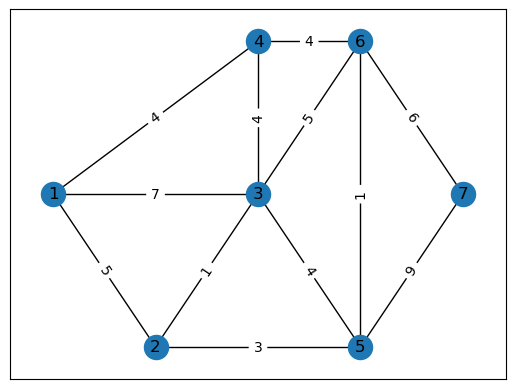

In [18]:
import networkx as nx

G = nx.Graph()
G.add_nodes_from(range(1,7))
G.add_edge(1, 2, weight = 5)
G.add_edge(1, 3, weight = 7)
G.add_edge(1, 4, weight = 4)
G.add_edge(2, 3, weight = 1)
G.add_edge(2, 5, weight = 3)
G.add_edge(3, 4, weight = 4)
G.add_edge(3, 5, weight = 4)
G.add_edge(3, 6, weight = 5)
G.add_edge(4, 6, weight = 4)
G.add_edge(5, 7, weight = 9)
G.add_edge(6, 5, weight = 1)
G.add_edge(6, 7, weight = 6)

pos={1:(0,0), 2:(1,-1), 3:(2,0), 4:(2,1), 5:(3,-1), 6:(3,1), 7:(4,0)}
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx(G, pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels)

In [20]:
flow_value, flow_dict = nx.maximum_flow(G, 1, 7, capacity="weight")

In [22]:
elek = list(G.edges())
for i in range(len(elek)):
    print("x"+str(elek[i])+" =", flow_dict[elek[i][0]][elek[i][1]])
print("Maximális folyam össz. értéke:", flow_value)

x(1, 2) = 4
x(1, 3) = 6
x(1, 4) = 4
x(2, 3) = 1
x(2, 5) = 3
x(3, 4) = 0
x(3, 5) = 4
x(3, 6) = 3
x(4, 6) = 4
x(5, 7) = 8
x(5, 6) = 0
x(6, 7) = 6
Maximális folyam össz. értéke: 14


In [24]:
cut_value, partition = nx.minimum_cut(G, 1, 7, capacity="weight")
reachable, non_reachable = partition

In [26]:
print("W =", reachable)
print("W'=", non_reachable)
print("Minimális vágás értéke:", cut_value)

W = {1, 2, 3, 4, 6}
W'= {5, 7}
Minimális vágás értéke: 14


3. feladat: Legyen a fentebb megadott $G$ gráfban minden (irányított) él helyén egy-egy irányítatlan él, azonos élsúllyal. Keressünk maximális folyamot és minimális vágást az irányított gráfban!

{(1, 2): Text(0.4999883318087086, -0.49998833180870883, '5'),
 (1, 3): Text(1.000002278713509, 0.0, '7'),
 (1, 4): Text(0.9999986661132425, 0.4999993330566208, '4'),
 (2, 3): Text(1.4999883318087082, -0.5000116681912914, '1'),
 (2, 5): Text(2.0000022787135094, -1.0, '3'),
 (3, 4): Text(2.0, 0.5000260262750085, '4'),
 (3, 5): Text(2.499988331808709, -0.49998833180870883, '4'),
 (3, 6): Text(2.499988331808709, 0.4999883318087086, '5'),
 (4, 6): Text(2.4999942337162793, 1.0, '4'),
 (5, 7): Text(3.499988331808709, -0.5000116681912914, '9'),
 (5, 6): Text(2.9999999999999996, 4.033325239793939e-06, '1'),
 (6, 7): Text(3.499988331808709, 0.5000116681912914, '6')}

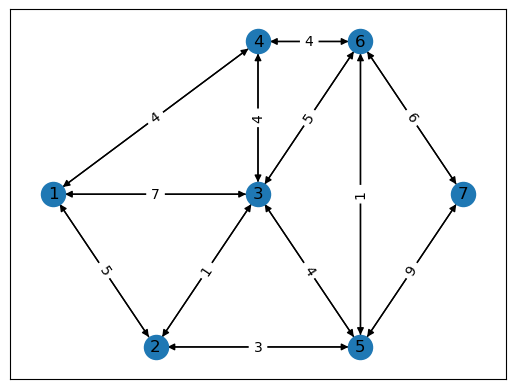

In [28]:
# Megoldás: módosítjuk irányítatlan verzióra
G = G.to_directed(as_view=False)
nx.draw_networkx(G, pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels)

{(1, 2): Text(0.4999883318087086, -0.49998833180870883, '5'),
 (1, 3): Text(1.000002278713509, 0.0, '7'),
 (1, 4): Text(0.9999986661132425, 0.4999993330566208, '4'),
 (2, 3): Text(1.4999883318087082, -0.5000116681912914, '1'),
 (2, 5): Text(2.0000022787135094, -1.0, '3'),
 (3, 4): Text(2.0, 0.5000260262750085, '4'),
 (3, 5): Text(2.499988331808709, -0.49998833180870883, '4'),
 (3, 6): Text(2.499988331808709, 0.4999883318087086, '5'),
 (4, 6): Text(2.4999942337162793, 1.0, '4'),
 (5, 7): Text(3.499988331808709, -0.5000116681912914, '9'),
 (5, 6): Text(2.9999999999999996, 4.033325239793939e-06, '1'),
 (6, 7): Text(3.499988331808709, 0.5000116681912914, '6')}

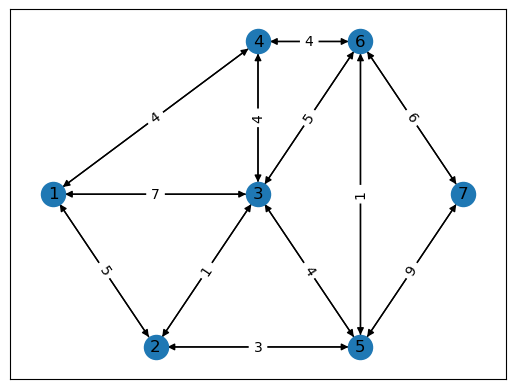

In [74]:
# Alternatív megoldás:
for i,j in G.edges():
    G.add_edge(j, i, weight = G[i][j]["weight"])
nx.draw_networkx(G, pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels)

In [30]:
flow_value, flow_dict = nx.maximum_flow(G, 1, 7, capacity="weight")

In [32]:
elek = list(G.edges())
for i in range(len(elek)):
    print("x"+str(elek[i])+" =", flow_dict[elek[i][0]][elek[i][1]])
print("Maximális folyam össz. értéke:", flow_value)

x(1, 2) = 4
x(1, 3) = 6
x(1, 4) = 4
x(2, 1) = 0
x(2, 3) = 1
x(2, 5) = 3
x(3, 1) = 0
x(3, 2) = 0
x(3, 4) = 0
x(3, 5) = 4
x(3, 6) = 3
x(4, 1) = 0
x(4, 3) = 0
x(4, 6) = 4
x(5, 2) = 0
x(5, 3) = 0
x(5, 7) = 8
x(5, 6) = 0
x(6, 3) = 0
x(6, 4) = 0
x(6, 5) = 1
x(6, 7) = 6
x(7, 5) = 0
x(7, 6) = 0
Maximális folyam össz. értéke: 14


In [34]:
cut_value, partition = nx.minimum_cut(G, 1, 7, capacity="weight")
reachable, non_reachable = partition

In [36]:
print("W =", reachable)
print("W'=", non_reachable)
print("Minimális vágás értéke:", cut_value)

W = {1, 2, 3, 4, 6}
W'= {5, 7}
Minimális vágás értéke: 14


A maximális folyam ezúttal nem változott
* nem használtunk 'vissza'-éleket
* általánosságban persze ez előfordulhat
* mint ahogy a vágást is újra kell értelmeznünk

Vágás kapacitása az irányított esetben az összes $W - W'$, azaz egy $W$-beli és egy $W'$-beli csúcs közötti él kapacitásainak összege.
* Az él-duplázos irányított verzióban továbbra is a $W \to W'$ éleken összegzett kapacitás

Komplementaritás hasonlóan: max folyam / min vágás esetén
* Az összes $W - W'$ irányított él telített
* Az összes $W \to W'$ irányított él telített, és egyik $W' \to W$ irányított élen sincs pozitív folyam

## Több forrás, több nyelő

Több forrás: több, mint 1 csúcsban érkezik be folyam a rendszerbe ($s_i$)
<br>Több nyelő: több, mint 1 csúcsnál távozik folyam a rendszerből ($t_j$)

Ekkor vezessünk be 1-1 'szuper'-forrást ($s$) és 'szuper'-nyelőt ($t$)
* $s$-ből minden $s_i$ forrásba vezessen él, kellően nagy $M$ kapacitással
* minden $t_i$ nyelőből $t$-be vezessen él, kellően nagy $M$ kapacitással
* $M$ legyen elegendő a max folyam érték átvitelére
* Például az összes $s_i$-ből kilépő, vagy az összes $t_j$-be beérkező teljes kapacitás

Példa: az 1. feladatban megadott gráf módosítása (1-1 extra forással és nyelővel)

{(1, 4): Text(0.9999835819471627, 0.16666940300880606, '2'),
 (1, 5): Text(0.9999920499976724, 0.6666640166658913, '3'),
 (2, 3): Text(0.5000193961896, -0.6666795974597336, '5'),
 (2, 4): Text(0.9999835819471627, -0.16666940300880628, '7'),
 (2, 5): Text(1.0000109348911792, 0.33334062326078606, '4'),
 (3, 4): Text(1.4999883318087082, -0.5000116681912914, '1'),
 (3, 6): Text(2.0000022787135094, -1.0, '3'),
 (4, 5): Text(2.0, 0.5000260262750085, '4'),
 (4, 6): Text(2.499988331808709, -0.49998833180870883, '4'),
 (4, 7): Text(2.499988331808709, 0.4999883318087086, '5'),
 (5, 7): Text(2.4999942337162793, 1.0, '4'),
 (6, 8): Text(3.5000019225990386, -0.33333076986794685, '9'),
 (6, 9): Text(3.5000193961896, -0.6666537358736, '3'),
 (7, 6): Text(2.9999999999999996, -4.033325240238028e-06, '1'),
 (7, 8): Text(3.5000193961896, 0.6666537358736, '6'),
 (7, 9): Text(3.5000019225990386, 0.33333076986794663, '4')}

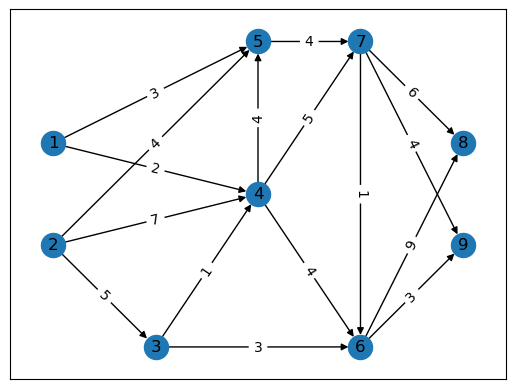

In [38]:
G = nx.DiGraph()
G.add_nodes_from(range(1,10))
G.add_edge(1, 4, weight = 2)
G.add_edge(1, 5, weight = 3)
G.add_edge(2, 3, weight = 5)
G.add_edge(2, 4, weight = 7)
G.add_edge(2, 5, weight = 4)
G.add_edge(3, 4, weight = 1)
G.add_edge(3, 6, weight = 3)
G.add_edge(4, 5, weight = 4)
G.add_edge(4, 6, weight = 4)
G.add_edge(4, 7, weight = 5)
G.add_edge(5, 7, weight = 4)
G.add_edge(6, 8, weight = 9)
G.add_edge(6, 9, weight = 3)
G.add_edge(7, 6, weight = 1)
G.add_edge(7, 8, weight = 6)
G.add_edge(7, 9, weight = 4)

pos={1:(0,1/3), 2:(0,-1/3), 3:(1,-1), 4:(2,0), 5:(2,1), 6:(3,-1), 7:(3,1), 8:(4,1/3), 9:(4,-1/3)}
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx(G, pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels)

4. feladat: Keressünk maximális folyamot és minimális vágást $G$-ben az $1,2$ forrásokból a $8,9$ nyelőkbe!

In [40]:
# Megoldás: hozzáadjuk a 'szuper'-forrást és 'szuper'-nyelőt

# a forrásokat elhagyó teljes kapacitás:
M1 = sum(G[i][j]['weight'] for i,j in G.out_edges(1)) + sum(G[i][j]['weight'] for i,j in G.out_edges(2))
# a nyelőkbe beérkező teljes kapacitás:
M2 = sum(G[i][j]['weight'] for i,j in G.in_edges(8)) + sum(G[i][j]['weight'] for i,j in G.in_edges(9))
# elég a kettő közül a kisebb:
M = min(M1,M2)

G.add_edge(0, 1, weight = M)
G.add_edge(0, 2, weight = M)
G.add_edge(8, 10, weight = M)
G.add_edge(9, 10, weight = M)

{(1, 4): Text(1.0000285422429447, 0.16666190962617544, '2'),
 (1, 5): Text(0.9999908884055917, 0.6666636294685304, '3'),
 (2, 3): Text(0.4999997657723725, -0.666666510514915, '5'),
 (2, 4): Text(1.0000285422429447, -0.16666190962617589, '7'),
 (2, 5): Text(1.0000113297719508, 0.3333408865146339, '4'),
 (3, 4): Text(1.5000018619466573, -0.4999981380533429, '1'),
 (3, 6): Text(2.000016008503736, -1.0, '3'),
 (4, 5): Text(2.0, 0.5000260262750085, '4'),
 (4, 6): Text(2.5000018619466573, -0.5000018619466575, '4'),
 (4, 7): Text(2.5000018619466573, 0.5000018619466569, '5'),
 (5, 7): Text(2.4999873619526625, 1.0, '4'),
 (6, 8): Text(3.500007825321518, -0.33332289957130956, '9'),
 (6, 9): Text(3.4999997657723716, -0.6666668228184185, '3'),
 (7, 6): Text(3.000000000000001, -4.033325240238028e-06, '1'),
 (7, 8): Text(3.4999997657723716, 0.6666668228184185, '6'),
 (7, 9): Text(3.500007825321518, 0.33332289957130934, '4'),
 (8, 10): Text(4.500026396475732, 0.16665786784142278, '21'),
 (9, 10): Tex

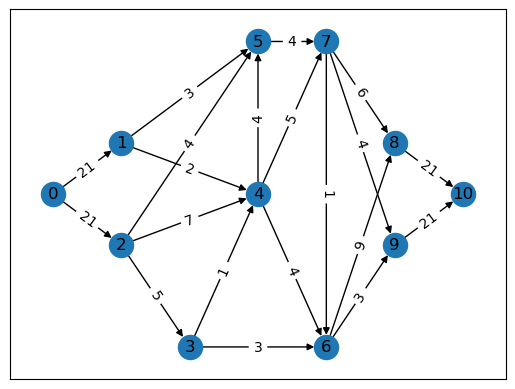

In [42]:
pos={0: (-1,0), 1:(0,1/3), 2:(0,-1/3), 3:(1,-1), 4:(2,0), 5:(2,1), 6:(3,-1), 7:(3,1), 8:(4,1/3), 9:(4,-1/3), 10:(5, 0)}
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx(G, pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels)

In [44]:
flow_value, flow_dict = nx.maximum_flow(G, 0, 10, capacity="weight")

In [46]:
elek = list(G.edges())
for i in range(len(elek)):
    print("x"+str(elek[i])+" =", flow_dict[elek[i][0]][elek[i][1]])
print("Maximális folyam össz. értéke:", flow_value)

x(1, 4) = 1
x(1, 5) = 0
x(2, 3) = 4
x(2, 4) = 7
x(2, 5) = 4
x(3, 4) = 1
x(3, 6) = 3
x(4, 5) = 0
x(4, 6) = 4
x(4, 7) = 5
x(5, 7) = 4
x(6, 8) = 7
x(6, 9) = 0
x(7, 6) = 0
x(7, 8) = 6
x(7, 9) = 3
x(8, 10) = 13
x(9, 10) = 3
x(0, 1) = 1
x(0, 2) = 15
Maximális folyam össz. értéke: 16


In [48]:
cut_value, partition = nx.minimum_cut(G, 0, 10, capacity="weight")
reachable, non_reachable = partition

In [50]:
print("W =", reachable)
print("W'=", non_reachable)
print("Minimális vágás értéke:", cut_value)

W = {0, 1, 2, 3, 4, 5}
W'= {6, 7, 8, 9, 10}
Minimális vágás értéke: 16


## Csúcskapacitások

Csúcsoknak is lehet átviteli kapacitásuk (nem csak éleknek)
* Időegység alatt a csúcson keresztül áramló folyam felülről korlátolt

Gráf-módosítás: az adott csúcsot 'félbevágjuk'
* az eredeti csúcsba érkező élek a 'bejövő félhez' csatlakoznak
* az eredeti csúcsból távozó élek a 'távozó félből' indulnak ki
* a két 'fél' között egy él a bejövőből a távozóba
* az új élen az élkapacitás a csúcs kapacitása

Példa: az 1. feladatban megadott gráf a 3-as csúcson 5, a 6-os csúcson 4 csúcskapacitással!
5. feladat: Keressünk maximális folyamot és minimális vágást az így kapott gráfban!

{(1, 2): Text(0.5000018619466575, -0.5000018619466575, '5'),
 (1, '3be'): Text(1.0000160085037353, 0.0, '7'),
 (1, 4): Text(1.4999979991698635, 0.4999993330566208, '4'),
 (2, '3be'): Text(1.500001861946657, -0.4999981380533429, '1'),
 (2, 5): Text(2.9999994025565684, -1.0, '3'),
 ('3be', '3ki'): Text(2.4999873619526616, 0.0, '5'),
 (4, '6be'): Text(3.4999873619526625, 1.0, '4'),
 (5, 7): Text(5.500001861946657, -0.4999981380533429, '9'),
 ('3ki', 4): Text(3.0, 0.5000260262750085, '4'),
 ('3ki', 5): Text(4.000002278713509, -0.5000011393567547, '4'),
 ('3ki', '6be'): Text(3.5000018619466573, 0.5000018619466569, '5'),
 ('6be', '6ki'): Text(4.4999873619526625, 1.0, '4'),
 ('6ki', 5): Text(5.0, -4.033325240238028e-06, '1'),
 ('6ki', 7): Text(5.500001861946657, 0.4999981380533427, '6')}

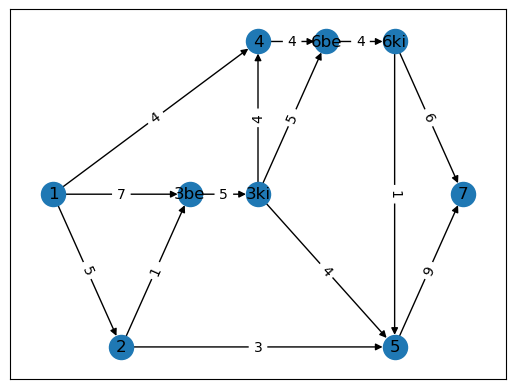

In [52]:
# Megoldás:

G = nx.DiGraph()
G.add_edge(1, 2, weight = 5)
G.add_edge(1, '3be', weight = 7)
G.add_edge(1, 4, weight = 4)
G.add_edge(2, '3be', weight = 1)
G.add_edge(2, 5, weight = 3)
G.add_edge('3ki', 4, weight = 4)
G.add_edge('3ki', 5, weight = 4)
G.add_edge('3ki', '6be', weight = 5)
G.add_edge(4, '6be', weight = 4)
G.add_edge(5, 7, weight = 9)
G.add_edge('6ki', 5, weight = 1)
G.add_edge('6ki', 7, weight = 6)

G.add_edge('3be', '3ki', weight = 5)
G.add_edge('6be', '6ki', weight = 4)

pos={1:(0,0), 2:(1,-1), '3be':(2,0), '3ki': (3,0), 4:(3,1), 5:(5,-1), '6be':(4,1), '6ki':(5,1), 7:(6,0)}
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx(G, pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels)

In [54]:
flow_value, flow_dict = nx.maximum_flow(G, 1, 7, capacity="weight")

In [56]:
elek = list(G.edges())
for i in range(len(elek)):
    print("x"+str(elek[i])+" =", flow_dict[elek[i][0]][elek[i][1]])
print("Maximális folyam össz. értéke:", flow_value)

x(1, 2) = 3
x(1, '3be') = 5
x(1, 4) = 3
x(2, '3be') = 0
x(2, 5) = 3
x('3be', '3ki') = 5
x(4, '6be') = 3
x(5, 7) = 7
x('3ki', 4) = 0
x('3ki', 5) = 4
x('3ki', '6be') = 1
x('6be', '6ki') = 4
x('6ki', 5) = 0
x('6ki', 7) = 4
Maximális folyam össz. értéke: 11


In [58]:
cut_value, partition = nx.minimum_cut(G, 1, 7, capacity="weight")
reachable, non_reachable = partition

In [108]:
print("W =", reachable)
print("W'=", non_reachable)
print("Minimális vágás értéke:", cut_value)

W = {1, 2, 4, '3ki', '3be', '6be'}
W'= {'6ki', 5, 7}
Minimális vágás értéke: 11


## Legrövidebb út, mint folyam feladat

Adott gráfban $s$-ből $t$-be vezető legrövidebb út
* minimális költségű folyam
* legalább 1 folyam értékkel (*optimumban pontosan 1*)
* $s$ forrásból $t$ nyelőbe
* az élek 'kiépítési' költsége az él hossza
* az élkapacitás mindenhol 1

6. feladat: az 1. feladatban megadott gráfban keressük a legrövidebb utat $1$-ből $7$-be folyam feladatként.

{(1, 2): Text(0.4999883318087086, -0.49998833180870883, '5'),
 (1, 3): Text(1.000002278713509, 0.0, '7'),
 (1, 4): Text(0.9999986661132425, 0.4999993330566208, '4'),
 (2, 3): Text(1.4999883318087082, -0.5000116681912914, '1'),
 (2, 5): Text(2.0000022787135094, -1.0, '3'),
 (3, 4): Text(2.0, 0.5000260262750085, '4'),
 (3, 5): Text(2.499988331808709, -0.49998833180870883, '4'),
 (3, 6): Text(2.499988331808709, 0.4999883318087086, '5'),
 (4, 6): Text(2.4999942337162793, 1.0, '4'),
 (5, 7): Text(3.499988331808709, -0.5000116681912914, '9'),
 (6, 5): Text(2.9999999999999996, -4.033325240238028e-06, '1'),
 (6, 7): Text(3.499988331808709, 0.5000116681912914, '6')}

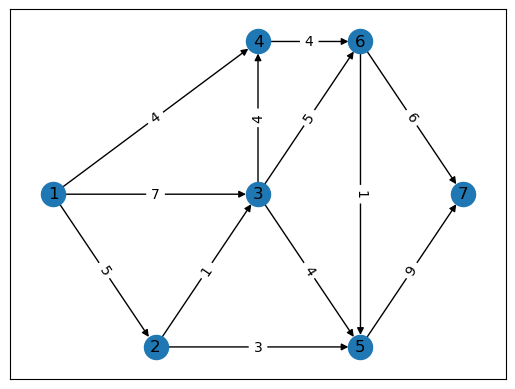

In [60]:
G = nx.DiGraph()
G.add_nodes_from(range(1,7))
G.add_edge(1, 2, weight = 5)
G.add_edge(1, 3, weight = 7)
G.add_edge(1, 4, weight = 4)
G.add_edge(2, 3, weight = 1)
G.add_edge(2, 5, weight = 3)
G.add_edge(3, 4, weight = 4)
G.add_edge(3, 5, weight = 4)
G.add_edge(3, 6, weight = 5)
G.add_edge(4, 6, weight = 4)
G.add_edge(5, 7, weight = 9)
G.add_edge(6, 5, weight = 1)
G.add_edge(6, 7, weight = 6)

pos={1:(0,0), 2:(1,-1), 3:(2,0), 4:(2,1), 5:(3,-1), 6:(3,1), 7:(4,0)}
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx(G, pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels)

In [40]:
# Megoldás:

lru = LpProblem('min_költségű_1_folyam', LpMinimize)

x = LpVariable.dicts('x',[(i,j) for i,j in G.edges()], lowBound = 0, cat="Continuous")

# célfüggvény:
lru += lpSum([G[i][j]['weight']*x[i,j] for i,j in G.edges()])

#Kapacitáskorlátok
for i,j in G.edges():
    lru += x[i,j] <= 1

#A folyammegmaradási feltételek (a forrásra és a nyelőre nem kell felírni)
for v in G.nodes():
    if v == 1 or v == 7:  
        continue
    else:
        lru += lpSum(x[i,j] for i,j in G.in_edges(v))-lpSum(x[i,j] for i,j in G.out_edges(v)) == 0

# legalább 1 értékű folyam
lru += x[6,7] + x[5,7] >= 1
    
megoldas = lru.solve()

print(LpStatus[megoldas])
if LpStatus[megoldas] == 'Optimal':
    print('Minimális költség: z* = ', value(lru.objective))
    for i,j in G.edges():
        print ("x"+str((i,j))+" =", x[i,j].varValue)

Optimal
Minimális költség: z* =  14.0
x(1, 2) = 0.0
x(1, 3) = 0.0
x(1, 4) = 1.0
x(2, 3) = 0.0
x(2, 5) = 0.0
x(3, 4) = 0.0
x(3, 5) = 0.0
x(3, 6) = 0.0
x(4, 6) = 1.0
x(5, 7) = 0.0
x(6, 5) = 0.0
x(6, 7) = 1.0
